# Web Scraping Flipkart Data

In [4]:
import pandas as pd
import undetected_chromedriver as uc
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

In [7]:
driver = uc.Chrome()

#initializing the lists

Product_name, Prices, Description, Reviews = [], [], [], []

for k in range(2,8):
    url = f'https://www.flipkart.com/search?q=mobiles+under+50000&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_HistoryAutoSuggest_1_7_na_na_na&otracker1=AS_QueryStore_HistoryAutoSuggest_1_7_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobiles+under+50000%7CMobiles&requestId=7b5137f7-0513-4ab5-8f02-28a55120896e&as-searchtext=mobiles&page={k}'
    print(f'Scraping:{url}')
    driver.get(url)
    
    #wait for it to load
    time.sleep(9)
    
    names = driver.find_elements(By.CLASS_NAME, "KzDlHZ")
    if not names:
        print(f"Page {k}: No data found (check class names)")
        continue
        
    prices = driver.find_elements(By.CLASS_NAME, "Nx9bqj")
    if not prices:
        print(f"Page {k}: No data found (check class names)")
        continue
        
    descs = driver.find_elements(By.CLASS_NAME, "G4BRas")
    if not descs:
        print(f"Page {k}: No data found (check class names)")
        continue
        
    revs = driver.find_elements(By.CLASS_NAME, "XQDdHH")
    if not revs:
        print(f"Page {k}: No data found (check class names)")
        continue
    
    # Find max items in this page
    max_items = max(len(names), len(prices), len(descs), len(revs))
    
    # Normalize lengths by filling missing values
    for i in range(max_items):
        Product_name.append(names[i].text.strip() if i < len(names) else None)
        Prices.append(prices[i].text.strip() if i < len(prices) else None)
        Description.append(descs[i].text.strip() if i < len(descs) else None)
        Reviews.append(revs[i].text.strip() if i < len(revs) else None)


#Close the browser
driver.quit()

#create dataframe
df = pd.DataFrame({"Product Name": Product_name,"Prices": Prices,"Description": Description,"Reviews": Reviews})

print(df.head())

#convert to csv
df.to_csv("flipkart_mobiles.csv", index=False)


Scraping:https://www.flipkart.com/search?q=mobiles+under+50000&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_HistoryAutoSuggest_1_7_na_na_na&otracker1=AS_QueryStore_HistoryAutoSuggest_1_7_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobiles+under+50000%7CMobiles&requestId=7b5137f7-0513-4ab5-8f02-28a55120896e&as-searchtext=mobiles&page=2
Scraping:https://www.flipkart.com/search?q=mobiles+under+50000&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_HistoryAutoSuggest_1_7_na_na_na&otracker1=AS_QueryStore_HistoryAutoSuggest_1_7_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobiles+under+50000%7CMobiles&requestId=7b5137f7-0513-4ab5-8f02-28a55120896e&as-searchtext=mobiles&page=3
Scraping:https://www.flipkart.com/search?q=mobiles+under+50000&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_HistoryAutoSuggest_1_7_na_na_na&otracker1=AS_QueryStore_HistoryAutoSuggest_1_7_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobiles+under+50000%7CMobiles&requestId=7b5137f7-0513-4ab5-

# Analysis

Problem Statement : 
Customers compare smartphones before purchasing. Business stakeholders want to know whether price and product reviews (ratings) are significantly related, and if premium brands (Apple, Samsung, OnePlus) receive higher ratings compared to other brands.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [4]:
#load the dataset
df = pd.read_csv('flipkart_mobiles.csv')
df.head()

,Product Name,Prices,Description,Reviews
0,"Samsung Galaxy S24 5G (Onyx Black, 128 GB)","₹49,999",8 GB RAM | 128 GB ROM\n15.75 cm (6.2 inch) Ful...,4.6
1,"Samsung Galaxy S24 FE 5G (Mint, 256 GB)","₹45,999",8 GB RAM | 256 GB ROM\n17.02 cm (6.7 inch) Ful...,4.5
2,"REDMI Note-14 Pro 5G (Phantom Purple, 128 GB)","₹23,449",8 GB RAM | 128 GB ROM\n16.94 cm (6.67 inch) Di...,4.3
3,"REDMI Note 14 Pro 5G (Titan Black, 256 GB)","₹24,999",8 GB RAM | 256 GB ROM\n16.94 cm (6.67 inch) Di...,4.3
4,"vivo T4 Ultra 5G (Meteor Grey, 512 GB)","₹41,999",12 GB RAM | 512 GB ROM\n16.94 cm (6.67 inch) F...,4.5


In [5]:
#data cleaning

# Drop unnecessary column
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Clean Prices
df['Prices'] = df['Prices'].replace({'₹':'', ',':''}, regex=True)
df['Prices'] = pd.to_numeric(df['Prices'], errors='coerce')

# Handle missing values
df = df.dropna(subset=['Prices','Reviews'])

# Extract Brand
df['Brand'] = df['Product Name'].str.split().str[0]
df.head()

,Product Name,Prices,Description,Reviews,Brand
0,"Samsung Galaxy S24 5G (Onyx Black, 128 GB)",49999.0,8 GB RAM | 128 GB ROM\n15.75 cm (6.2 inch) Ful...,4.6,Samsung
1,"Samsung Galaxy S24 FE 5G (Mint, 256 GB)",45999.0,8 GB RAM | 256 GB ROM\n17.02 cm (6.7 inch) Ful...,4.5,Samsung
2,"REDMI Note-14 Pro 5G (Phantom Purple, 128 GB)",23449.0,8 GB RAM | 128 GB ROM\n16.94 cm (6.67 inch) Di...,4.3,REDMI
3,"REDMI Note 14 Pro 5G (Titan Black, 256 GB)",24999.0,8 GB RAM | 256 GB ROM\n16.94 cm (6.67 inch) Di...,4.3,REDMI
4,"vivo T4 Ultra 5G (Meteor Grey, 512 GB)",41999.0,12 GB RAM | 512 GB ROM\n16.94 cm (6.67 inch) F...,4.5,vivo


# Hypothesis 1: Price vs Reviews

H₀: No significant correlation between smartphone price and customer review rating.

H₁: Significant correlation exists.

In [10]:
pearson_corr, p_value = stats.pearsonr(df['Prices'], df['Reviews'])
spearman_corr, sp_p_value = stats.spearmanr(df['Prices'], df['Reviews'])

print('Pearson_corr:',pearson_corr)
print('Pearson_pvalue:',p_value)
print('Spearman_corr',spearman_corr)
print('Spearman p_value:',sp_p_value)

if p_value < 0.05:
    print('p_value(Pearson) is less than 0.05. We reject null hypoythesis')
else:
    print('p_value(Pearson) is greater than 0.05. We fail to reject null hypothesis.')
    
if sp_p_value < 0.05:
    print('sp_p_value(Spearman) is less than 0.05. We reject null hypoythesis')
else:
    print('sp_p_value(Spearman) is greater than 0.05. We fail to reject null hypothesis.')

Pearson_corr: 0.0434480121875364
Pearson_pvalue: 0.5703102735633803
Spearman_corr 0.22715218224963266
Spearman p_value: 0.002651891101569269
p_value(Pearson) is greater than 0.05. We fail to reject null hypothesis.
sp_p_value(Spearman) is less than 0.05. We reject null hypoythesis


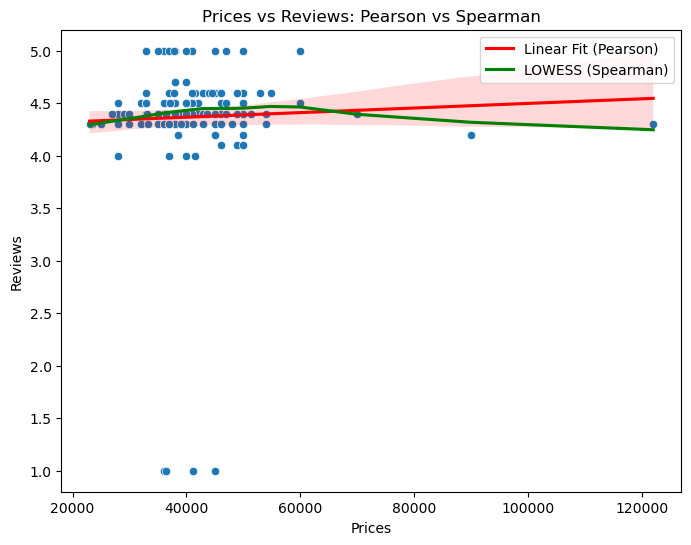

In [9]:
#scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Prices'], y=df['Reviews'])

# Linear regression line (for Pearson)
sns.regplot(x=df['Prices'], y=df['Reviews'], scatter=False, 
            line_kws={'color':'red'}, label="Linear Fit (Pearson)")

# Non-linear trend (LOWESS smoother for monotonic patterns)
sns.regplot(x=df['Prices'], y=df['Reviews'], scatter=False, 
            lowess=True, line_kws={'color':'green'}, label="LOWESS (Spearman)")

plt.xlabel("Prices")
plt.ylabel("Reviews")
plt.title("Prices vs Reviews: Pearson vs Spearman")
plt.legend()
plt.show()

Interpretation

Prices and Reviews don’t have a strong linear relationship, but they do have a monotonic relationship (as prices increase, ratings tend to move in a consistent but non-linear way).

# Hypothesis 2

H₀: No significant difference in ratings across brands.
H₁: Significant difference exists.

One way ANOVA We want to test whether mean reviews (continuous) differ across brands (categorical).

Here, We have:

1 categorical independent variable → Brand

1 continuous dependent variable → Review

Two-way ANOVA → used if you had two categorical variables (e.g., Brand and Storage Size) and wanted to see how both affect Reviews.

In [14]:
# Focus on top brands vs others
#Form brand groups
df['BrandGroup'] = df['Brand'].apply(lambda x: x if x in ['Apple','Samsung','OnePlus'] else 'Others')
df.head()

,Product Name,Prices,Description,Reviews,Brand,BrandGroup
0,"Samsung Galaxy S24 5G (Onyx Black, 128 GB)",49999.0,8 GB RAM | 128 GB ROM\n15.75 cm (6.2 inch) Ful...,4.6,Samsung,Samsung
1,"Samsung Galaxy S24 FE 5G (Mint, 256 GB)",45999.0,8 GB RAM | 256 GB ROM\n17.02 cm (6.7 inch) Ful...,4.5,Samsung,Samsung
2,"REDMI Note-14 Pro 5G (Phantom Purple, 128 GB)",23449.0,8 GB RAM | 128 GB ROM\n16.94 cm (6.67 inch) Di...,4.3,REDMI,Others
3,"REDMI Note 14 Pro 5G (Titan Black, 256 GB)",24999.0,8 GB RAM | 256 GB ROM\n16.94 cm (6.67 inch) Di...,4.3,REDMI,Others
4,"vivo T4 Ultra 5G (Meteor Grey, 512 GB)",41999.0,12 GB RAM | 512 GB ROM\n16.94 cm (6.67 inch) F...,4.5,vivo,Others


In [17]:
#for each group_name and group the reviews are converted into lists of numpy array
groups = [group['Reviews'].values for name_group, group in df.groupby('BrandGroup')]
groups

[array([4.6, 4.6, 4.2, 4.6, 4.4, 4.4, 4.6, 4.4, 5. ]),
 array([4.4, 4.3, 4.6, 4.6, 4.6, 4.6]),
 array([4.3, 4.3, 4.5, 4.3, 4.5, 4.5, 4.5, 4.3, 4.5, 4.4, 4.4, 4.5, 4.3,
        4.4, 4.4, 4.1, 4.5, 5. , 5. , 4.3, 5. , 4.4, 4.3, 4.3, 4.3, 4.3,
        4.4, 4.5, 4.5, 4.6, 4.4, 4.4, 4.2, 4.3, 4.4, 4.4, 4.6, 4.6, 4. ,
        1. , 4.3, 5. , 4.2, 4.3, 4.3, 4.3, 4.6, 4.4, 4.3, 4.3, 4.5, 4.4,
        4.4, 4.2, 5. , 1. , 4.4, 5. , 1. , 4.3, 4.3, 4.5, 4.4, 4.4, 4.4,
        4.5, 4.6, 1. , 4.1, 5. , 4. , 4.3, 4.3, 4.5, 4.3, 4.3, 4.3, 4.3,
        4.5, 4.5, 4.3, 4.3, 4.3, 4.3, 4.5, 4.4, 4.4, 4.3, 4.3, 4.3, 4.5,
        4.4, 4.5, 4.5, 5. , 5. , 4.4, 5. , 4.3, 4.3, 4.5, 4.4, 4.3, 4.3,
        4.3, 4.7, 4.7, 4.5, 4.3, 4.7, 4.7, 4.4, 4.4, 4.4, 4.7, 4.7, 4.3,
        4.5, 4.3, 4. , 5. , 4.6, 5. , 4. ]),
 array([4.6, 4.5, 4.3, 4.4, 4.3, 4.4, 4.6, 4.3, 4.6, 4.6, 4.6, 4.6, 4.3,
        4.6, 4.3, 4.6, 4.3, 4.3, 4.6, 4.3, 4.4, 4.2, 4.2, 4.1, 4.3, 4.6,
        4.1, 4.4, 4.6, 4.6, 4.4, 4.4, 4.4, 4.3])]

In [23]:
#One way ANOVA test
f_stat, p_val_anova = stats.f_oneway(*groups)
print('F_stat:',f_stat), print('p_value_anova:',p_val_anova)

if p_value < 0.05:
    print('p_val_anova is less than 0.05. We reject null hypoythesis.There is significant diff in ratings across brands')
else:
    print('p_val_anova is greater than 0.05. We fail to reject null hypothesis.There is no significant diff in ratings across brands')

F_stat: 0.6123396936734455
p_value_anova: 0.6078894931042607
p_val_anova is greater than 0.05. We fail to reject null hypothesis.There is no significant diff in ratings across brands


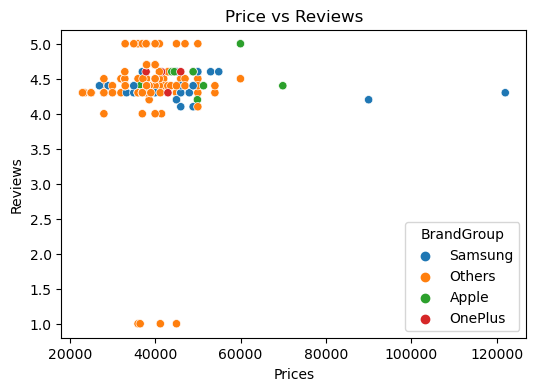

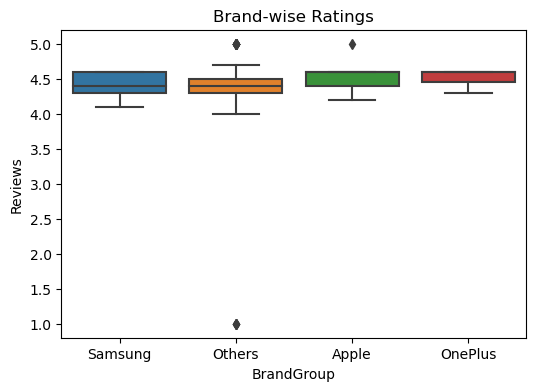

In [19]:
# Price vs Reviews scatter
plt.figure(figsize=(6,4))
sns.scatterplot(x='Prices', y='Reviews', data=df, hue='BrandGroup')
plt.title('Price vs Reviews')
plt.show()

# Brand comparison boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x='BrandGroup', y='Reviews', data=df)
plt.title('Brand-wise Ratings')
plt.show()

# Conclusion

Correlation is weak, meaning price doesn't guarantee higher ratings.

ANOVA tells brands don't have significantly different ratings as compared to each others although premium brands(Samsung,Apple,OnePlus) have a slightly higher ratings.